In [16]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

In [3]:
ds = xr.open_dataset('/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20150321.nc')

In [5]:
! ls -l /data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20150321.nc

-rw-rw-r-- 1 tjarniko tjarniko 172991728 Jun 15  2020 /data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20150321.nc


In [49]:
dn = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_20150321.nc')
dp = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_20150321.nc')

In [8]:
dn

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: model_output

In [21]:
mymask=np.array(dn['model_output']['pH'])>1e15

In [23]:
pH = np.ma.array(np.array(dn['model_output']['pH']), mask=mymask)

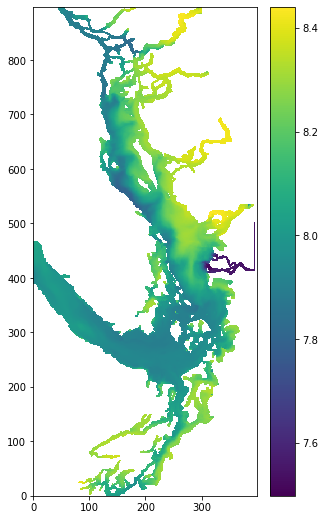

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(pH[0])
fig.colorbar(colours);

In [63]:
dia_param = {'K': 1.7e-7,
             'Cm': 6.81e-8,
             'n': 0.13,
             'm': 73.83}

hapto_nc_param = {'K': 2.5e-6,
             'Cm': 2.86e-10,
             'n': 0.82,
             'm': 162.77}

def growth(Hconc, param):
    crit = (1 - Hconc / param['K'])
    rel_growth = crit**param['n'] * Hconc / (Hconc + param['Cm'] * crit**param['m'])
    return rel_growth

In [84]:
print (-np.log10(dia_param['K']), -np.log10(hapto_nc_param['K']))
print (-np.log10(dia_param['Cm']), -np.log10(hapto_nc_param['Cm']))

6.769551078621726 5.6020599913279625
7.166852888087215 9.543633966870956


In [50]:
Hconc_n = 10**(-pH)

In [51]:
pHp = np.ma.array(np.array(dp['model_output']['pH']), mask=mymask)
Hconc_p = 10**(-pHp)

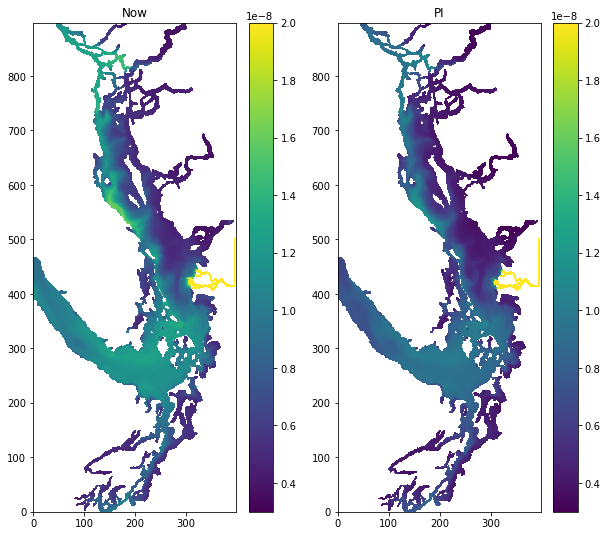

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 9))
colours = axs[0].pcolormesh(Hconc_n[0], vmin=0.3e-8, vmax=2e-8)
axs[0].set_title('Now')
fig.colorbar(colours, ax=axs[0]);
colours = axs[1].pcolormesh(Hconc_p[1], vmin=0.3e-8, vmax=2e-8)
axs[1].set_title('PI')
fig.colorbar(colours, ax=axs[1]);

In [64]:
rel_growth_n = growth(Hconc_n, dia_param)
rel_growth_p = growth(Hconc_p, dia_param)

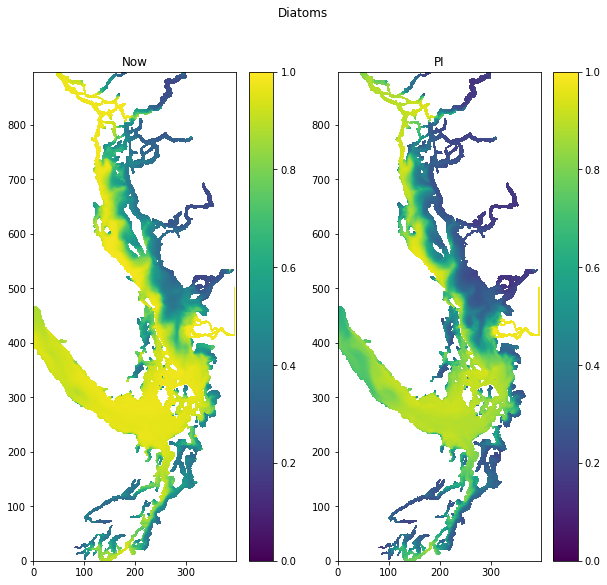

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10, 9))
colours = axs[0].pcolormesh(rel_growth_n[0], vmin=0, vmax=1)
axs[0].set_title('Now')
fig.colorbar(colours, ax=axs[0]);
colours = axs[1].pcolormesh(rel_growth_p[1], vmin=0, vmax=1)
axs[1].set_title('PI')
fig.suptitle('Diatoms')
fig.colorbar(colours, ax=axs[1]);

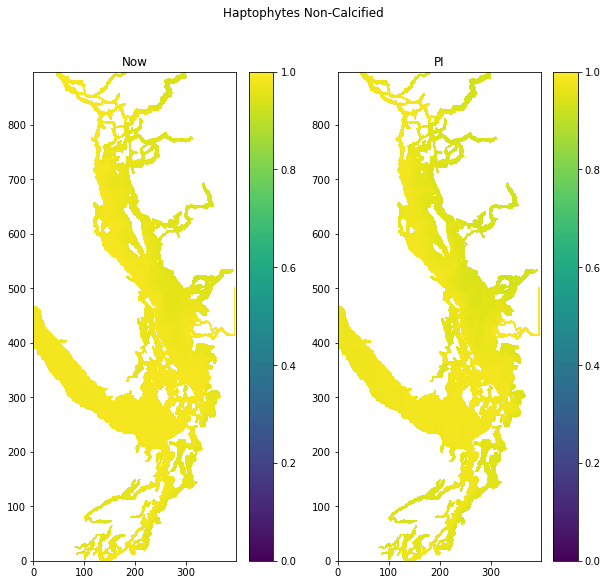

In [68]:
rel_growth_n = growth(Hconc_n, hapto_nc_param)
rel_growth_p = growth(Hconc_p, hapto_nc_param)
fig, axs = plt.subplots(1, 2, figsize=(10, 9))
colours = axs[0].pcolormesh(rel_growth_n[0], vmin=0, vmax=1)
axs[0].set_title('Now')
fig.colorbar(colours, ax=axs[0]);
colours = axs[1].pcolormesh(rel_growth_p[1], vmin=0, vmax=1)
axs[1].set_title('PI')
fig.suptitle('Haptophytes Non-Calcified')
fig.colorbar(colours, ax=axs[1]);

<ipython-input-63-bc4e238c45de>:13: RuntimeWarning: invalid value encountered in power
  rel_growth = crit**param['n'] * Hconc / (Hconc + param['Cm'] * crit**param['m'])


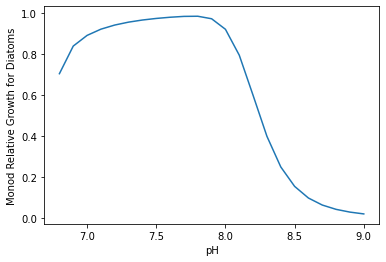

In [87]:
pH = np.arange(6.6, 9.1, 0.1)
Hconc = 10**(-pH)
rel_growth = growth(Hconc, dia_param)
plt.plot(pH, rel_growth);
plt.xlabel('pH')
plt.ylabel('Monod Relative Growth for Diatoms');

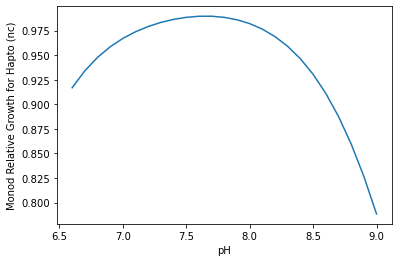

In [85]:
pH = np.arange(6.6, 9.1, 0.1)
Hconc = 10**(-pH)
rel_growth = growth(Hconc, hapto_nc_param)
plt.plot(pH, rel_growth);
plt.xlabel('pH')
plt.ylabel('Monod Relative Growth for Hapto (nc)');

In [86]:
Hconc

array([2.51188643e-07, 1.99526231e-07, 1.58489319e-07, 1.25892541e-07,
       1.00000000e-07, 7.94328235e-08, 6.30957344e-08, 5.01187234e-08,
       3.98107171e-08, 3.16227766e-08, 2.51188643e-08, 1.99526231e-08,
       1.58489319e-08, 1.25892541e-08, 1.00000000e-08, 7.94328235e-09,
       6.30957344e-09, 5.01187234e-09, 3.98107171e-09, 3.16227766e-09,
       2.51188643e-09, 1.99526231e-09, 1.58489319e-09, 1.25892541e-09,
       1.00000000e-09])

In [88]:
np.log10(7.5e-9)

-8.1249387366083

In [89]:
S_costa_pH = np.array([6.5, 7, 7.5, 8, 8.5, 9, 9.4])
S_costa_gr = np.array([2.4, 2.2, 2.5, 2.3, 2.4, 1.7, 0.4])/2.5

In [90]:
S_costa_Hconc = 10**(-S_costa_pH)

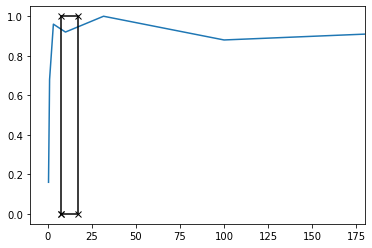

In [94]:
plt.plot(S_costa_Hconc*1e9, S_costa_gr)
plt.plot([7.5, 17, 17, 7.5, 7.5],  [0, 0, 1, 1, 0], 'kx-')
plt.xlim(-10, 180);

In [101]:
Ps_f_pH = np.array([7.95, 8.23, 8.43])
Ps_f_gr = np.array([0.38, 0.26, 0.12])/0.38

In [102]:
Ps_f_Hconc = 10**(-Ps_f_pH)

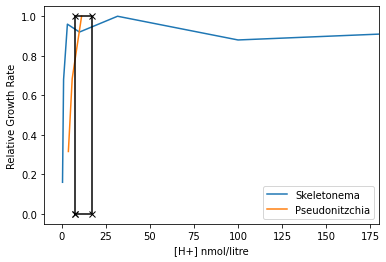

In [106]:
plt.plot(S_costa_Hconc*1e9, S_costa_gr, label="Skeletonema")
plt.plot(Ps_f_Hconc*1e9, Ps_f_gr, label="Pseudonitzchia")
plt.plot([7.5, 17, 17, 7.5, 7.5],  [0, 0, 1, 1, 0], 'kx-')
plt.xlim(-10, 180);
plt.xlabel("[H+] nmol/litre")
plt.ylabel("Relative Growth Rate")
plt.legend();